In [1]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import os

import keras.utils as img

In [2]:
images_path = "C:\\Users\\fijal\Documents\Repository\BIAI\sorted_data\sorted_data"
class_names = os.listdir(images_path)
number_of_classes = len(class_names)
data_set = img.image_dataset_from_directory(images_path, class_names=class_names)
DATASET_SIZE = (len(data_set))
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset = data_set.take(train_size)
test_dataset = data_set.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

Found 19802 files belonging to 2 classes.


In [3]:
model = keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(number_of_classes, activation="softmax")
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15
433/433 [==============================] - 68s 150ms/step - loss: 3.6185 - accuracy: 0.5489 - val_loss: 0.6746 - val_accuracy: 0.5966
Epoch 2/15
433/433 [==============================] - 64s 147ms/step - loss: 0.6646 - accuracy: 0.5997 - val_loss: 0.6684 - val_accuracy: 0.5836
Epoch 3/15
433/433 [==============================] - 64s 147ms/step - loss: 0.6440 - accuracy: 0.6243 - val_loss: 0.6528 - val_accuracy: 0.6456
Epoch 4/15
433/433 [==============================] - 64s 147ms/step - loss: 0.6225 - accuracy: 0.6505 - val_loss: 0.5966 - val_accuracy: 0.6799
Epoch 5/15
433/433 [==============================] - 64s 147ms/step - loss: 0.5957 - accuracy: 0.6756 - val_loss: 0.5820 - val_accuracy: 0.6929
Epoch 6/15
433/433 [==============================] - 65s 149ms/step - loss: 0.5731 - accuracy: 0.6913 - val_loss: 0.5814 - val_accuracy: 0.6885
Epoch 7/15
433/433 [==============================] - 65s 149ms/step - loss: 0.5462 - accuracy: 0.7112 - val_loss: 0.5872 - val_ac

In [4]:
results = model.evaluate(test_dataset)
print("test loss, test acc:", results)

92/92 [==============================] - 10s 39ms/step - loss: 0.5793 - accuracy: 0.7432
test loss, test acc: [0.579294741153717, 0.7432065010070801]


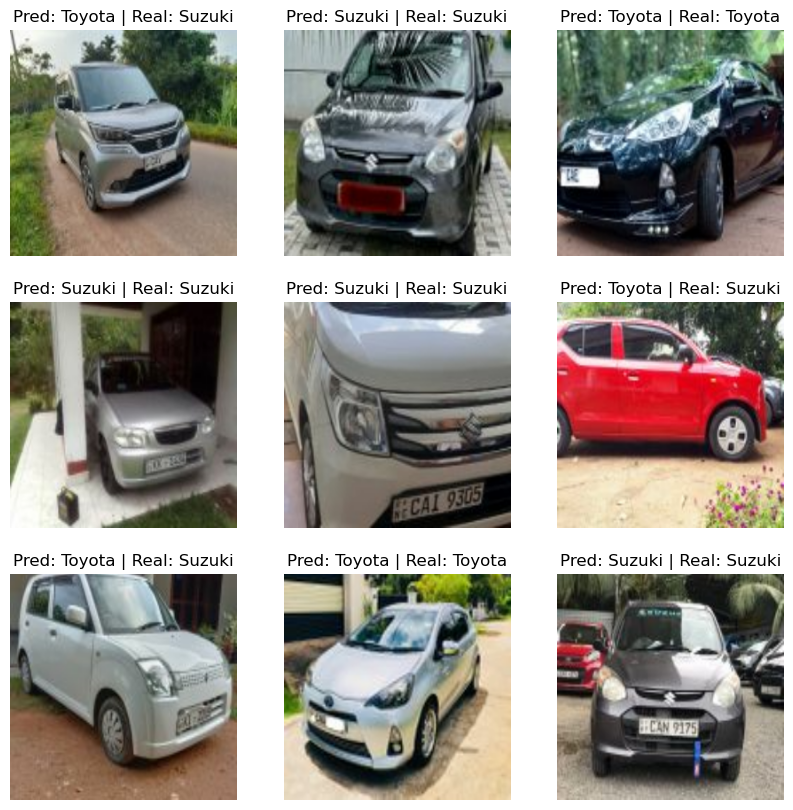

In [5]:
plt.figure(figsize=(10, 10))

for images, labels in val_dataset.take(1):
    classifications = model(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        index = (classifications[i].numpy()).tolist().index(max(classifications[i].numpy()))
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

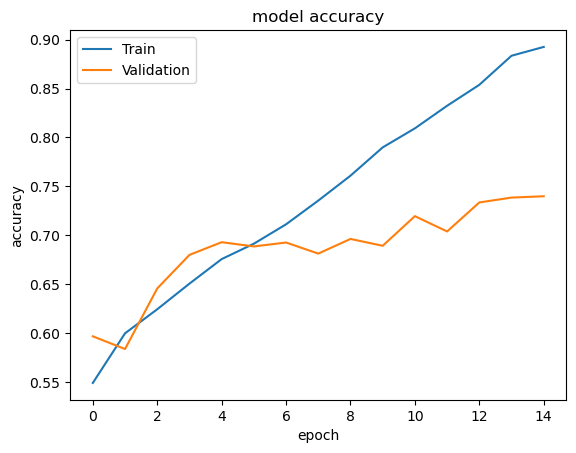

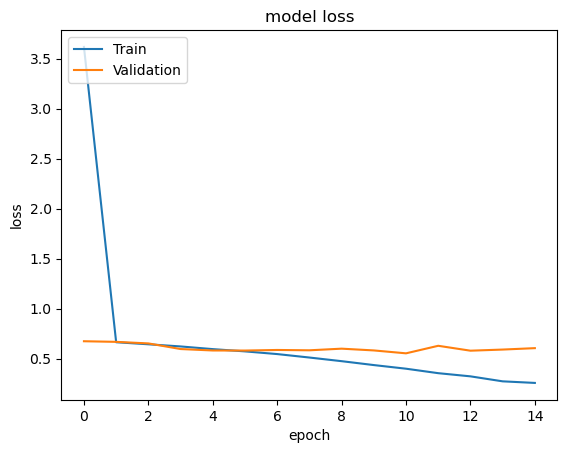

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
model.save('C:\\Users\\fijal\Documents\Repository\BIAI\Models_5_brands\Model1')

INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Models_2_brands\Model1\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Models_2_brands\Model1\assets
